# Twitter Sentiment Analysis Project

In this project, we aim to conduct a comprehensive analysis of the sentiments expressed by the Amazon CEO "Jeff Bezos" through their tweets. We will leverage various data points to delve into user emotions and attitudes:

1. **Tweet Content**: We will analyze the text of tweets to identify predominant emotions such as happiness, sadness, anger, among others.
2. **Geographical Location**: We will examine the location declared in user profiles to observe if there are emotional variations based on geographic regions.
3. **Interactions (Likes and Retweets)**: We will consider the number of likes and retweets tweets receive as indicators of their emotional impact on the audience.
4. **Tweet Creation Date**: We will investigate if there are seasonal or daily patterns in the emotions expressed over time.
5. **Sentiment**: We will use a trained sentiment model to make a prediction of what feelings is describing through the tweet.

The ultimate goal is to create a comprehensive analysis that allows us to better understand how emotions manifest on the Twitter platform and how these sentiments may vary based on factors such as location, social interactions, and contextual content. This analysis could have practical applications in fields such as market research, mental health, and social trend analysis.



## Load libraries
The first step in our project involves loading the essential libraries and tools required to perform sentiment analysis on Twitter data. These libraries will enable us to handle data manipulation, natural language processing (NLP), and data cleaning tasks efficiently. Here's a brief explanation of the key libraries we'll use:



In [1]:
!pip install ntscraper
!pip install pandas
!pip install requests
!pip install bs4
!pip install nltk
!pip install selenium
!pip install scipy
!pip install transformers
!pip install torch torchvision
!pip install wordcloud

  Using cached selenium-4.20.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached trio_websocket-0.11.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Using cached selenium-4.20.0-py3-none-any.whl (9.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 5.5 MB/s eta 0:00:00a 0:00:01
Using cached trio_websocket-0.11.1-py3-none-any.whl (17 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
Using cached wsproto-1.2.0-py3-none-an

In this initial step of our project, we will set up our Python environment by importing necessary libraries and utilize ntscraper to retrieve tweets containing the keyword "feelings" from Nitter, an alternative front-end for Twitter. Here's a concise description of this process:

## STEP 1: Importing libraries
We will start by importing the required libraries for data retrieval, text processing, sentiment analysis, and visualization.

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
from ntscraper import Nitter
import requests
import re
import json
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import time
from datetime import datetime
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vmxrls/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Using ntscraper to retrieve Tweets
We will define a function to query Nitter for tweets containing the keyword "feelings" extract relevant tweet information.

In [23]:
def pull_tweets():
  tweets_data = []
  scraper = Nitter(log_level=1, skip_instance_check=False)
  tweets = scraper.get_tweets("chelsea", mode="term", number=500)
  print(tweets)

  for tweet in tweets["tweets"]:
    text = tweet["text"]
    user = tweet["user"]["username"]
    date = tweet["date"]
    retweets = tweet["stats"]["retweets"]
    likes = tweet["stats"]["likes"]

    tweets_data.append({"text": text, "user": user, "date": date, "retweets": retweets, "likes": likes})
  return tweets_data

tweets = pull_tweets()
df_tweets = pd.DataFrame(tweets)

df_tweets

Testing instances: 100%|██████████| 77/77 [00:45<00:00,  1.69it/s]

16-May-24 11:34:39 - No instance specified, using random instance https://nitter.privacydev.net


16-May-24 11:34:39 - Empty page on https://nitter.privacydev.net
{'tweets': [], 'threads': []}


""


In [13]:
paises = [
    "Argentina", "Australia", "Austria", "Belgium", "Belize", "Bolivia", "Bosnia and Herzegovina", "Brazil", "Bulgaria",
    "Cameroon", "Canada", "Central African Republic", "Chile", "China", "Colombia",
    "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark",
    "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea",
    "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Guatemala",
    "Guinea", "Guinea-Bissau", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq",
    "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Kazakhstan", "Kenya", "Kiribati", "Korea, North",
    "Korea, South", "Laos", "Latvia", "Lithuania", "Luxembourg", "Madagascar", "Malaysia", "Maldives", "Mali", "Malta",
    "Mexico", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nepal", "Netherlands", "New Zealand", "Nicaragua",
    "Nigeria", "North Macedonia", "Norway", "Pakistan", "Palestine", "Panama", "Papua New Guinea", "Paraguay",
    "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Saudi Arabia", "Senegal", "Serbia",
    "Singapore", "Slovakia", "Slovenia", "South Africa",
    "Spain", "Sweden", "Switzerland", "Syria", "Taiwan",
    "Thailand", "Tunisia", "Turkey",
    "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay",
    "Venezuela", "Vietnam", "Zambia", "Zimbabwe"
]

df_tweets["location"] = [random.choice(paises) for _ in range(len(df_tweets))]
df_tweets

,text,user,date,retweets,likes,location
0,12/ All political players in Israel are stokin...,@ori_goldberg,"May 16, 2024 · 6:22 AM UTC",12,57,Iran
1,"🐰 why do my eyes look so sad? 🐰 anyway, i’m go...",@translatingTXT,"May 16, 2024 · 8:31 AM UTC",69,469,Latvia
2,What a way of making oneself heard. Sad!,@OgaliE,"May 16, 2024 · 8:54 AM UTC",0,0,Honduras
3,Ever wondered how terrorists are born? This ...,@Osint613,"May 15, 2024 · 3:52 PM UTC",670,1675,Mexico
4,I miss childhood. All I cared about was playin...,@scad_official,"May 16, 2024 · 6:44 AM UTC",41,69,Japan
5,This is sad. Imagine spending decades perfecti...,@irose_artoo,"May 15, 2024 · 11:35 PM UTC",400,1562,Dominican Republic
6,For everyone feeling frightened and sad right ...,@broadwaybabyto,"May 16, 2024 · 2:57 AM UTC",4,29,Iraq
7,"🔥🔥🔥BREAKING 😥😥😥 At 4.50pm this afternoon, an...",@CraigKellyPHON,"May 16, 2024 · 7:48 AM UTC",407,1015,Zimbabwe
8,Ruhu Şad Olsun,@Orsatramola,"May 14, 2024 · 12:24 PM UTC",96,1841,Slovakia
9,Sad truth: Cowok muka jelek bisa ketolong den...,@mhuseinali,"May 15, 2024 · 1:44 PM UTC",7072,32758,Bosnia and Herzegovina


## Step 3: Cleaning and preprocessing the data

In this step, we are going to do cleaning and preprocessing tasks in order to get our data processed.

In [14]:
def preprocess_date(date_str):
    return pd.to_datetime(date_str, format="%b %d, %Y · %I:%M %p UTC", errors="coerce")

df_tweets["date"] = df_tweets["date"].apply(preprocess_date)

df_tweets

,text,user,date,retweets,likes,location
0,12/ All political players in Israel are stokin...,@ori_goldberg,2024-05-16 06:22:00,12,57,Iran
1,"🐰 why do my eyes look so sad? 🐰 anyway, i’m go...",@translatingTXT,2024-05-16 08:31:00,69,469,Latvia
2,What a way of making oneself heard. Sad!,@OgaliE,2024-05-16 08:54:00,0,0,Honduras
3,Ever wondered how terrorists are born? This ...,@Osint613,2024-05-15 15:52:00,670,1675,Mexico
4,I miss childhood. All I cared about was playin...,@scad_official,2024-05-16 06:44:00,41,69,Japan
5,This is sad. Imagine spending decades perfecti...,@irose_artoo,2024-05-15 23:35:00,400,1562,Dominican Republic
6,For everyone feeling frightened and sad right ...,@broadwaybabyto,2024-05-16 02:57:00,4,29,Iraq
7,"🔥🔥🔥BREAKING 😥😥😥 At 4.50pm this afternoon, an...",@CraigKellyPHON,2024-05-16 07:48:00,407,1015,Zimbabwe
8,Ruhu Şad Olsun,@Orsatramola,2024-05-14 12:24:00,96,1841,Slovakia
9,Sad truth: Cowok muka jelek bisa ketolong den...,@mhuseinali,2024-05-15 13:44:00,7072,32758,Bosnia and Herzegovina


In [15]:
for date in df_tweets["date"]:
    df_tweets["year"] = df_tweets["date"].dt.year
    df_tweets["month"] = df_tweets["date"].dt.month
    df_tweets["day"] = df_tweets["date"].dt.day
    df_tweets["hour"] = df_tweets["date"].dt.hour

df_tweets = df_tweets.drop("date", axis=1)
df_tweets

,text,user,retweets,likes,location,year,month,day,hour
0,12/ All political players in Israel are stokin...,@ori_goldberg,12,57,Iran,2024,5,16,6
1,"🐰 why do my eyes look so sad? 🐰 anyway, i’m go...",@translatingTXT,69,469,Latvia,2024,5,16,8
2,What a way of making oneself heard. Sad!,@OgaliE,0,0,Honduras,2024,5,16,8
3,Ever wondered how terrorists are born? This ...,@Osint613,670,1675,Mexico,2024,5,15,15
4,I miss childhood. All I cared about was playin...,@scad_official,41,69,Japan,2024,5,16,6
5,This is sad. Imagine spending decades perfecti...,@irose_artoo,400,1562,Dominican Republic,2024,5,15,23
6,For everyone feeling frightened and sad right ...,@broadwaybabyto,4,29,Iraq,2024,5,16,2
7,"🔥🔥🔥BREAKING 😥😥😥 At 4.50pm this afternoon, an...",@CraigKellyPHON,407,1015,Zimbabwe,2024,5,16,7
8,Ruhu Şad Olsun,@Orsatramola,96,1841,Slovakia,2024,5,14,12
9,Sad truth: Cowok muka jelek bisa ketolong den...,@mhuseinali,7072,32758,Bosnia and Herzegovina,2024,5,15,13


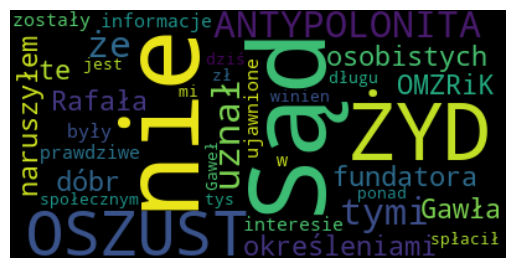

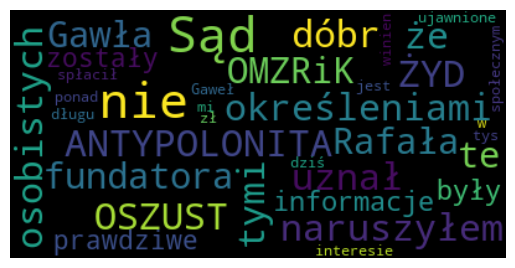

/var/folders/27/l7360fs534n5pnxnmzr18zy40000gn/T/ipykernel_31346/2136543935.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets["text"] = df_tweets["text"].str.lower()


,text,user,retweets,likes,location,year,month,day,hour
0,12 political players israel stok...,@ori_goldberg,12,57,Iran,2024,5,16,6
1,eyes look sad anyway goi...,@translatingTXT,69,469,Latvia,2024,5,16,8
2,way making oneself heard sad,@OgaliE,0,0,Honduras,2024,5,16,8
3,ever wondered terrorists born ...,@Osint613,670,1675,Mexico,2024,5,15,15
4,miss childhood cared playing ...,@scad_official,41,69,Japan,2024,5,16,6
5,sad imagine spending decades perfe...,@irose_artoo,400,1562,Dominican Republic,2024,5,15,23
6,everyone feeling frightened sad ri...,@broadwaybabyto,4,29,Iraq,2024,5,16,2
7,breaking 4 50pm afternoon ...,@CraigKellyPHON,407,1015,Zimbabwe,2024,5,16,7
8,ruhu şad olsun,@Orsatramola,96,1841,Slovakia,2024,5,14,12
9,sad truth cowok muka jelek bisa k...,@mhuseinali,7072,32758,Bosnia and Herzegovina,2024,5,15,13


In [16]:
filtered_texts = []
stop_words = set(stopwords.words('english'))

for text in df_tweets["text"]:
  tokens = regexp_tokenize(text, pattern=r'\w+|\s+', gaps=False)
  filtered_text = re.sub(r'[\U00010000-\U0010ffff]', '', ' '.join(tokens))

  filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
  filtered_text = ' '.join(filtered_tokens)
  filtered_texts.append(filtered_text)

df_tweets["text"] = filtered_texts

wordcloud = WordCloud().generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
df_tweets = df_tweets[df_tweets["text"].str.len() > 0]
df_tweets["text"] = df_tweets["text"].str.lower()

df_tweets

## Step 4: Create a new field called sentiment based on what feelings describes the 'text' field

In this step, we will analyze the "text" field to determine the sentiment associated with each entry. By leveraging natural language processing techniques, we'll classify the content into positive, negative, or neutral sentiments. This sentiment analysis will provide valuable insights into the overall emotional tone conveyed in the text data, enhancing our understanding of user sentiments on Twitter.


In [17]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
sentiments = []

for text in df_tweets["text"]:
  encoded_text = tokenizer(text, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  sentiment_idx = np.argmax(scores)
  if sentiment_idx == 0:
   sentiments.append("Negative")
  elif sentiment_idx == 1:
    sentiments.append("Neutral")
  else:
    sentiments.append("Posiitve")

df_tweets["sentiment"] = sentiments
cols = df_tweets.columns.tolist()
cols.insert(1, cols.pop(cols.index("sentiment")))
df_tweets = df_tweets[cols]
df_tweets.to_csv("../datos/tweets.csv")
df_tweets

/Users/vmxrls/miniconda3/envs/twitter_env/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/var/folders/27/l7360fs534n5pnxnmzr18zy40000gn/T/ipykernel_31346/3028837327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets["sentiment"] = sentiments


,text,sentiment,user,retweets,likes,location,year,month,day,hour
0,12 political players israel stok...,Negative,@ori_goldberg,12,57,Iran,2024,5,16,6
1,eyes look sad anyway goi...,Negative,@translatingTXT,69,469,Latvia,2024,5,16,8
2,way making oneself heard sad,Negative,@OgaliE,0,0,Honduras,2024,5,16,8
3,ever wondered terrorists born ...,Negative,@Osint613,670,1675,Mexico,2024,5,15,15
4,miss childhood cared playing ...,Negative,@scad_official,41,69,Japan,2024,5,16,6
5,sad imagine spending decades perfe...,Negative,@irose_artoo,400,1562,Dominican Republic,2024,5,15,23
6,everyone feeling frightened sad ri...,Negative,@broadwaybabyto,4,29,Iraq,2024,5,16,2
7,breaking 4 50pm afternoon ...,Neutral,@CraigKellyPHON,407,1015,Zimbabwe,2024,5,16,7
8,ruhu şad olsun,Neutral,@Orsatramola,96,1841,Slovakia,2024,5,14,12
9,sad truth cowok muka jelek bisa k...,Neutral,@mhuseinali,7072,32758,Bosnia and Herzegovina,2024,5,15,13
